### Namaster Example 4: Masks

This sample script showcases the apodization routine implemented in NaMaster

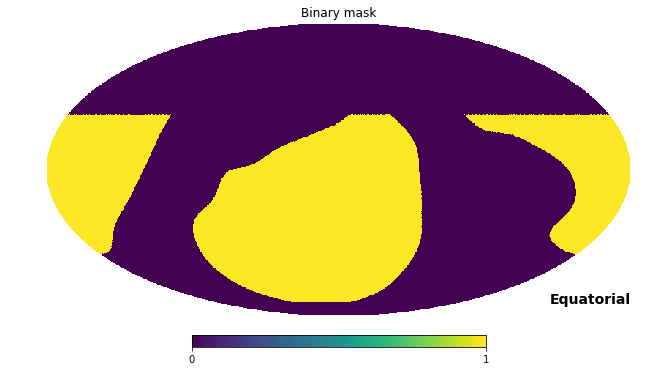

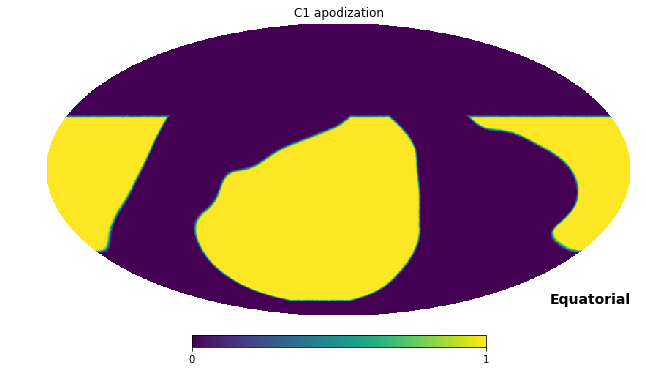

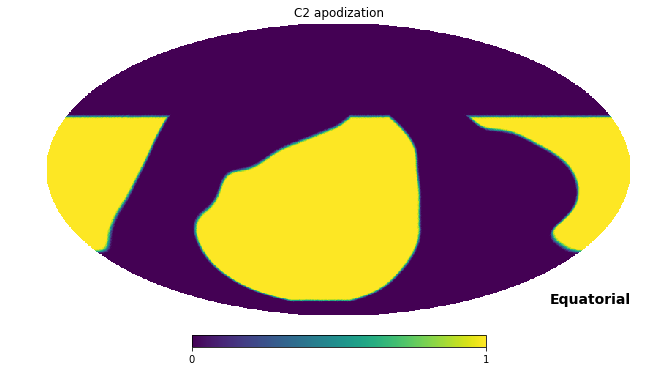

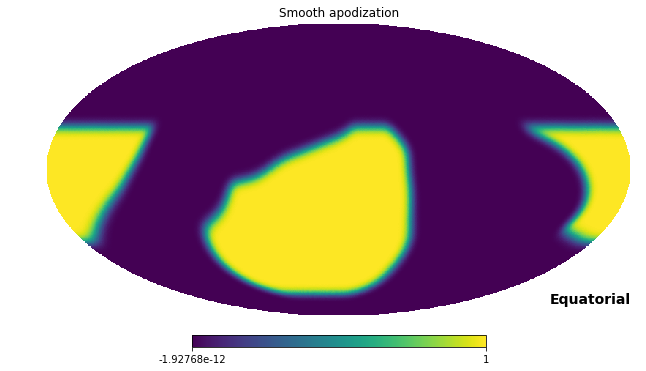

In [3]:
import healpy as hp
import matplotlib.pyplot as plt
import pymaster as nmt

# This script showcases the apodization routine included with pymaster
# and the three apodization modes supported.


# Read input binary mask
mask_raw = hp.read_map("mask.fits", verbose=False)

# The following function calls create apodized versions of the raw mask
# with an apodization scale of 2.5 degrees using three different methods

# Apodization scale in degrees
aposcale = 2.5

# C1 and C2: in these cases, pixels are multiplied by a factor f
#            (with 0<=f<=1) based on their distance to the nearest fully
#            masked pixel. The choices of f in each case are documented in
#            Section 3.4 of the C API documentation. All pixels separated
#            from any masked pixel by more than the apodization scale are
#            left untouched.
mask_C1 = nmt.mask_apodization(mask_raw, aposcale, apotype="C1")
mask_C2 = nmt.mask_apodization(mask_raw, aposcale, apotype="C2")

# Smooth: in this case, all pixels closer to a masked pixel than 2.5 times
#         the apodization scale are initially set to zero. The resulting
#         map is then smoothed with a Gaussian kernel with standard
#         deviation given by the apodization scale. Finally, all pixels
#         originally masked are forced back to zero.
mask_Sm = nmt.mask_apodization(mask_raw, aposcale, apotype="Smooth")

# Let's plot the results
hp.mollview(mask_raw, title='Binary mask', coord=['G', 'C'])
hp.mollview(mask_C1, title='C1 apodization', coord=['G', 'C'])
hp.mollview(mask_C2, title='C2 apodization', coord=['G', 'C'])
hp.mollview(mask_Sm, title='Smooth apodization', coord=['G', 'C'])
plt.show();